Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [5]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.datasets import make_classification
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from sklearn import metrics,model_selection
import statsmodels.api as sm
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import pandas as pd    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt   
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [6]:
df = pd.read_excel("Election_Data1.xlsx")

In [7]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
df.shape

(1525, 10)

In [9]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [11]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [12]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [13]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [14]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
df.duplicated().sum()

8

In [16]:
df.rename(columns = {'economic.cond.national' : 'economic_cond_national','economic.cond.household' : 'economic_cond_household', 'political.knowledge':'political_knowledge'}, inplace=True)

In [17]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.skew()

C:\Users\murb\AppData\Local\Temp\3\ipykernel_13840\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
dtype: float64

In [21]:
df.dtypes

vote                       object
age                         int64
economic_cond_national      int64
economic_cond_household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political_knowledge         int64
gender                     object
dtype: object

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

Univariate Analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic_cond_national'}>,
        <AxesSubplot:title={'center':'economic_cond_household'}>],
       [<AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>,
        <AxesSubplot:title={'center':'Europe'}>],
       [<AxesSubplot:title={'center':'political_knowledge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

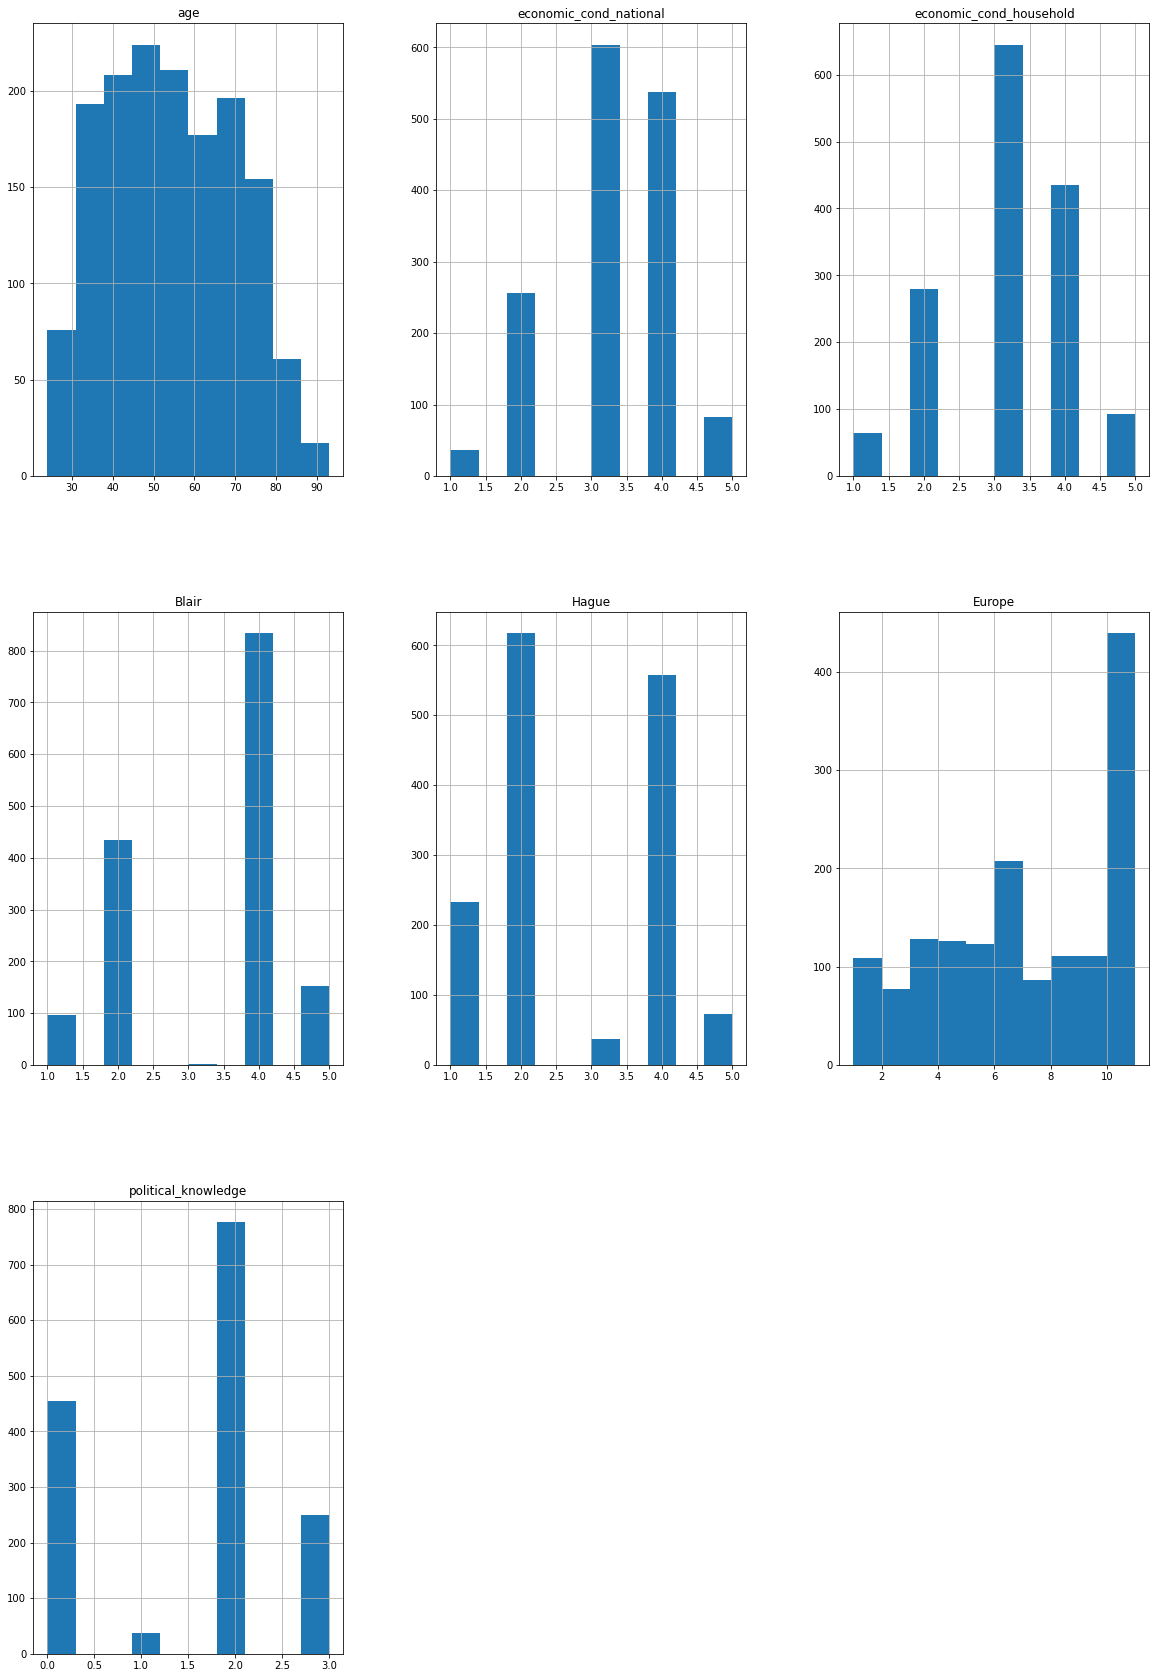

In [22]:
df.hist(figsize=(20,30))

In [23]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [24]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [25]:
df.Blair.unique()

array([4, 5, 2, 1, 3], dtype=int64)

array(['Labour', 'Conservative'], dtype=object)

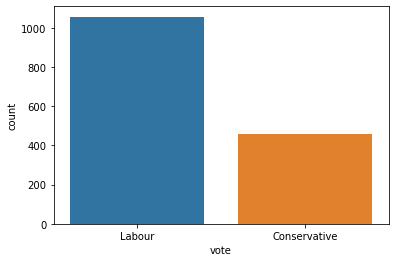

In [26]:
sns.countplot(x=df['vote'])
df.vote.unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91], dtype=int64)

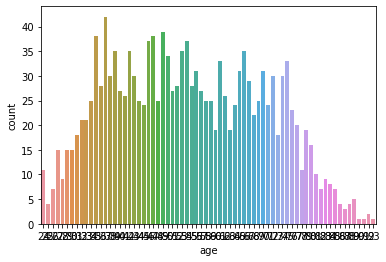

In [27]:
sns.countplot(x=df['age'])
df.age.unique()

array([3, 4, 2, 1, 5], dtype=int64)

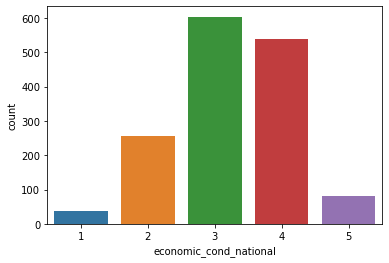

In [28]:
sns.countplot(x=df['economic_cond_national'])
df.economic_cond_national.unique()

array([3, 4, 2, 1, 5], dtype=int64)

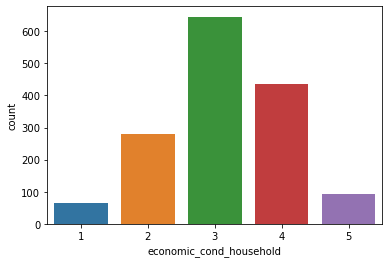

In [29]:
sns.countplot(x=df['economic_cond_household'])
df.economic_cond_national.unique()

array([3, 4, 2, 1, 5], dtype=int64)

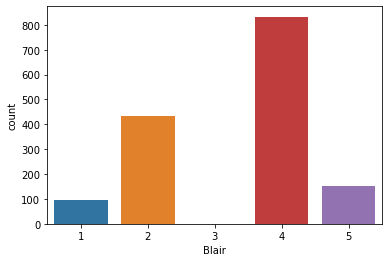

In [30]:
sns.countplot(x=df['Blair'])
df.economic_cond_national.unique()

array([1, 4, 2, 5, 3], dtype=int64)

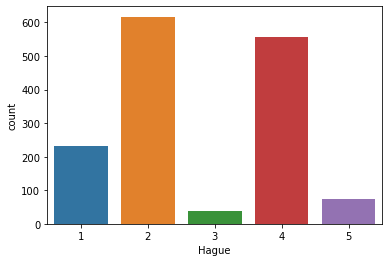

In [31]:
sns.countplot(x=df['Hague'])
df.Hague.unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8], dtype=int64)

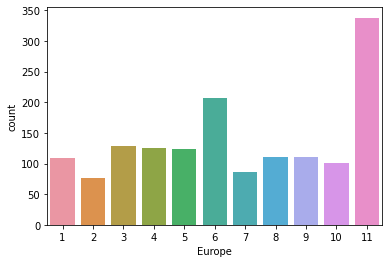

In [32]:
sns.countplot(x=df['Europe'])
df.Europe.unique()

array([2, 0, 3, 1], dtype=int64)

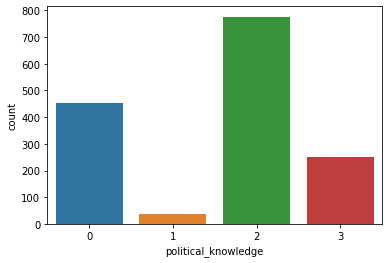

In [33]:
sns.countplot(x=df['political_knowledge'])
df.political_knowledge.unique()

array(['female', 'male'], dtype=object)

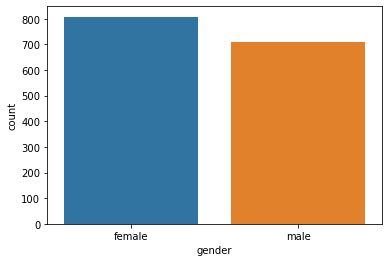

In [34]:
sns.countplot(x=df['gender'])
df.gender.unique()

In [35]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

Bivariate Analysis

<AxesSubplot:xlabel='age'>

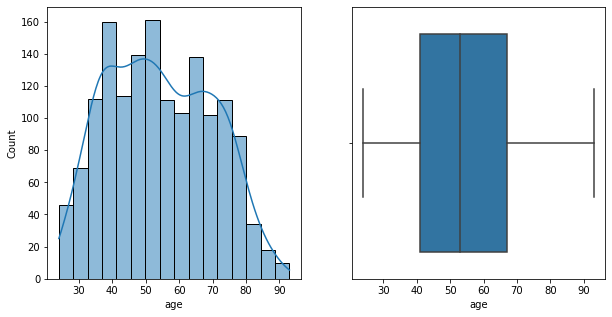

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.age, kde=True, ax=axs[0])
sns.boxplot(x='age',data=df, ax=axs[1])

<AxesSubplot:xlabel='economic_cond_national'>

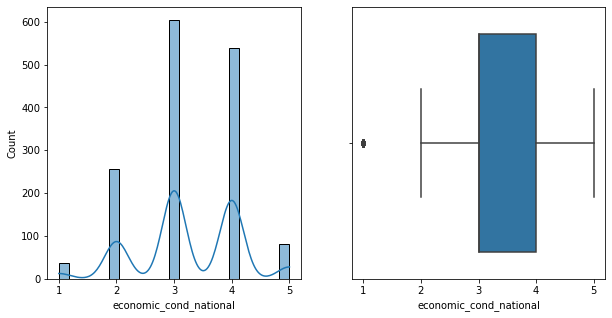

In [37]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.economic_cond_national, kde=True, ax=axs[0])
sns.boxplot(x='economic_cond_national',data=df, ax=axs[1])

<AxesSubplot:xlabel='economic_cond_household'>

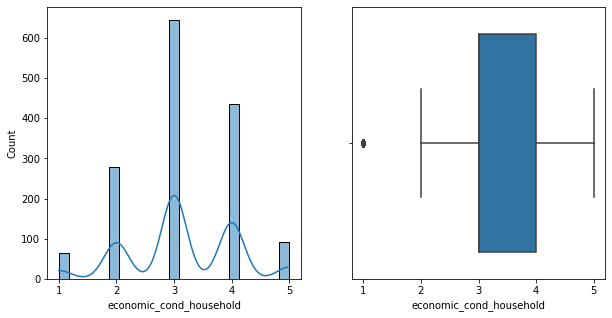

In [38]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.economic_cond_household, kde=True, ax=axs[0])
sns.boxplot(x='economic_cond_household',data=df, ax=axs[1])

<AxesSubplot:xlabel='Blair'>

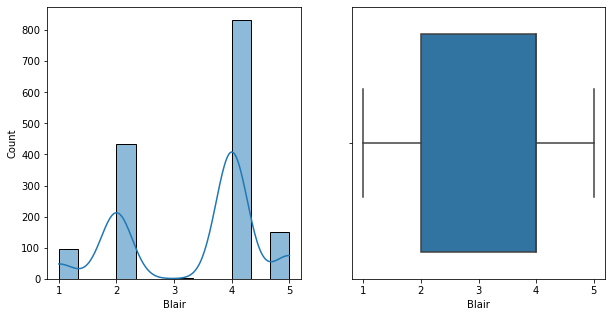

In [39]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Blair, kde=True, ax=axs[0])
sns.boxplot(x='Blair',data=df, ax=axs[1])

<AxesSubplot:xlabel='Hague'>

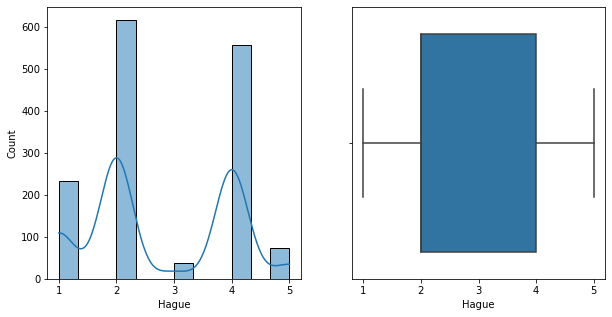

In [40]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Hague, kde=True, ax=axs[0])
sns.boxplot(x='Hague',data=df, ax=axs[1])

<AxesSubplot:xlabel='Europe'>

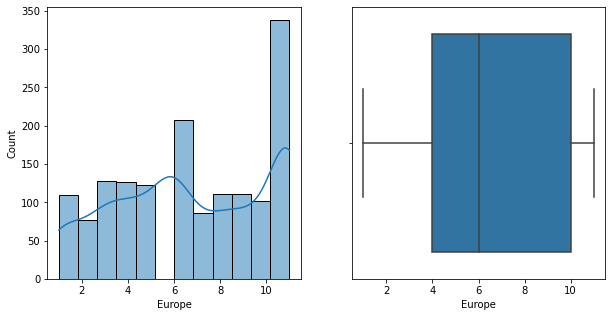

In [41]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Europe, kde=True, ax=axs[0])
sns.boxplot(x='Europe',data=df, ax=axs[1])

<AxesSubplot:xlabel='political_knowledge'>

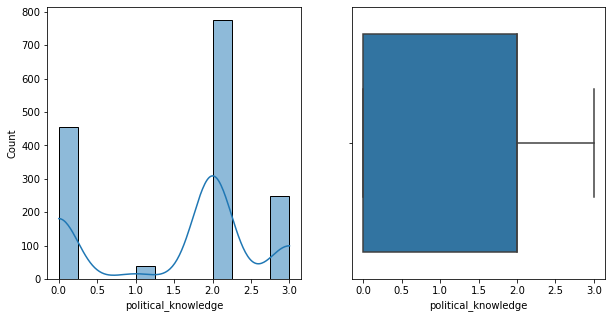

In [42]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.political_knowledge, kde=True, ax=axs[0])
sns.boxplot(x='political_knowledge',data=df, ax=axs[1])

In [43]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

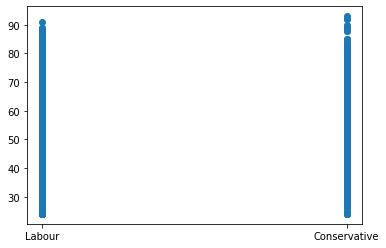

In [44]:
plt.scatter(df['vote'],df['age'])

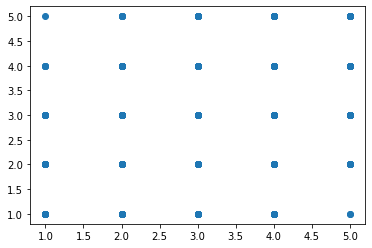

In [45]:
plt.scatter(df['economic_cond_national'],df['economic_cond_household'])

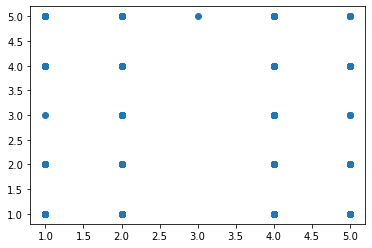

In [46]:
plt.scatter(df['Blair'],df['Hague'])

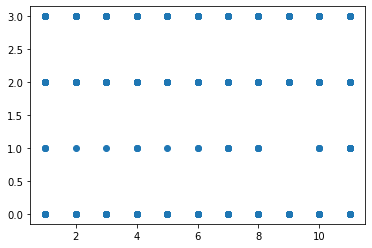

In [47]:
plt.scatter(df['Europe'],df['political_knowledge'])

In [48]:
df.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

<AxesSubplot:xlabel='vote', ylabel='age'>

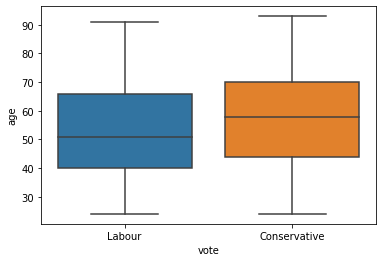

In [49]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='age', data=df)

<AxesSubplot:xlabel='economic_cond_national', ylabel='economic_cond_household'>

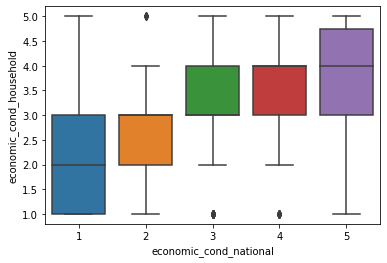

In [50]:
fig_dims = (12, 5)
sns.boxplot(x='economic_cond_national', y='economic_cond_household', data=df)

<AxesSubplot:xlabel='Blair', ylabel='Hague'>

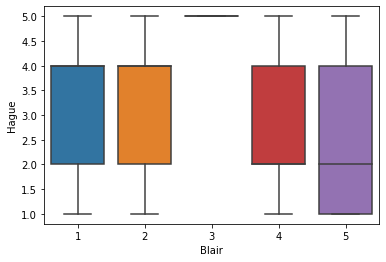

In [51]:
fig_dims = (12, 5)
sns.boxplot(x='Blair', y='Hague', data=df)

<AxesSubplot:xlabel='Europe', ylabel='political_knowledge'>

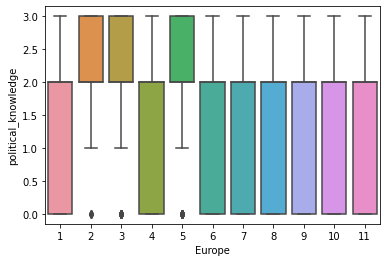

In [52]:
fig_dims = (12, 5)
sns.boxplot(x='Europe', y='political_knowledge', data=df)

In [53]:
corr = df.corr()
corr

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic_cond_national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic_cond_household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political_knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


<AxesSubplot:>

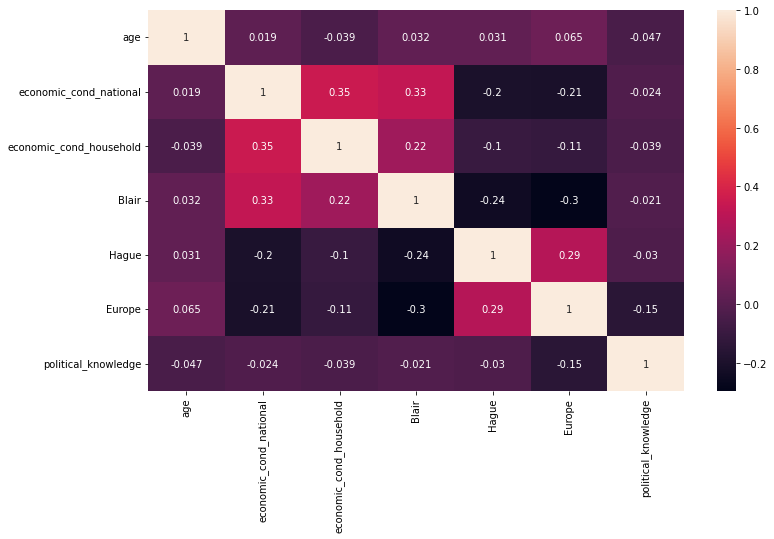

In [54]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

Multivariate Analysis

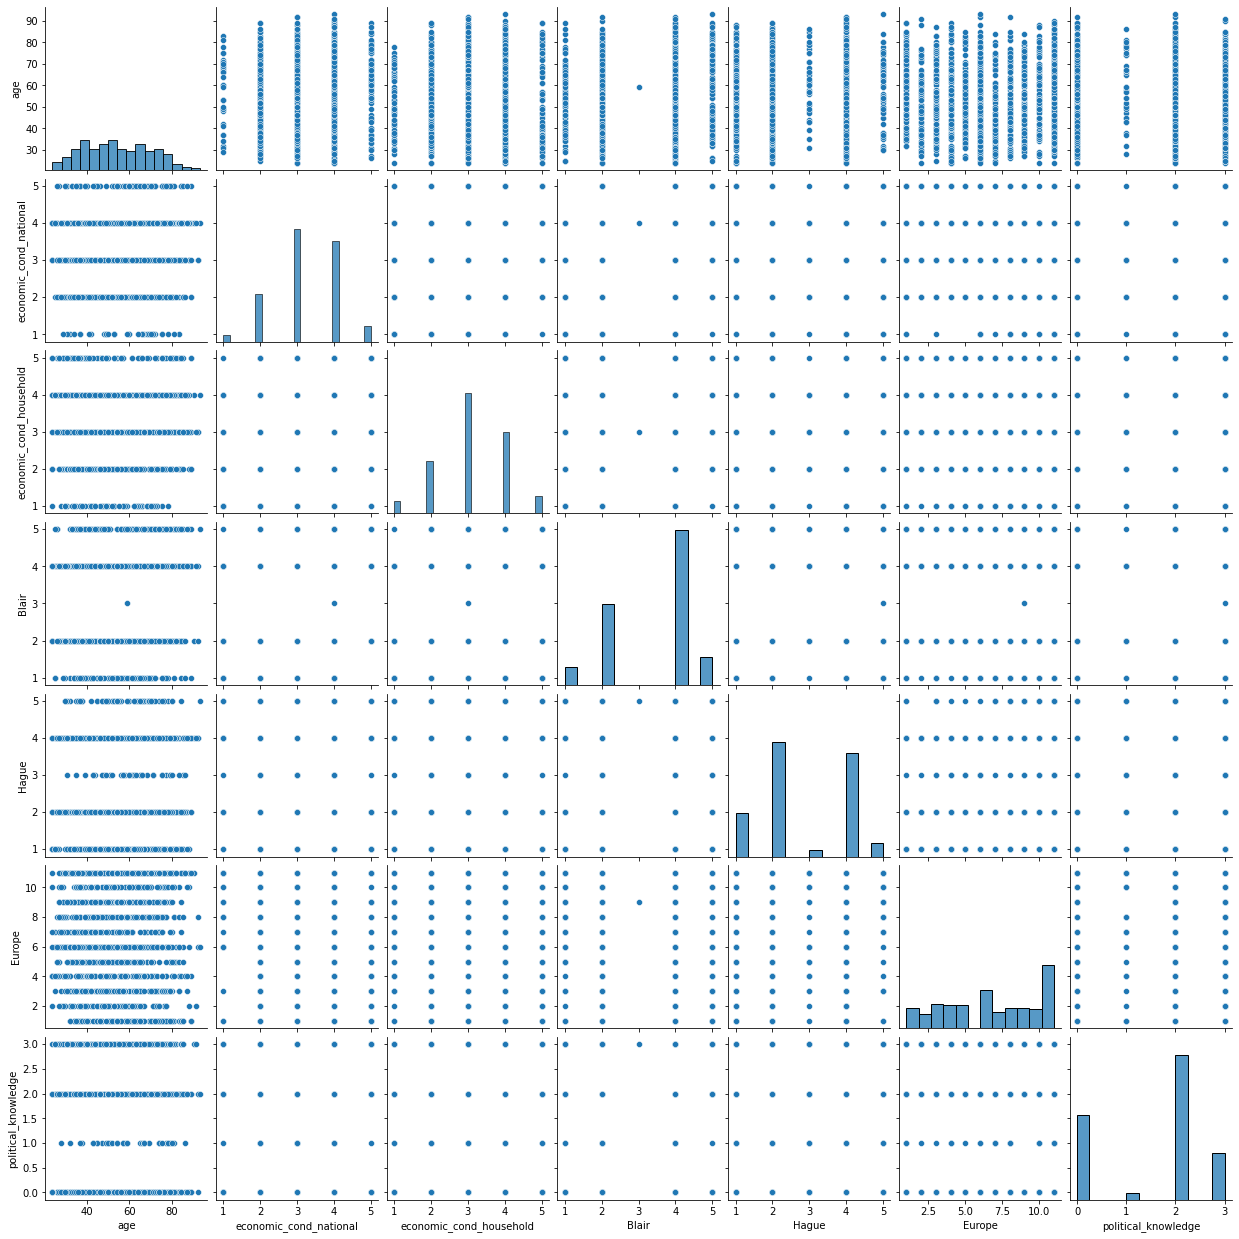

In [55]:
sns.pairplot(df)
plt.show()

Outliers

Checking for Outliers

In [56]:
df_num= df.select_dtypes(include=['float64','int64'])

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-p

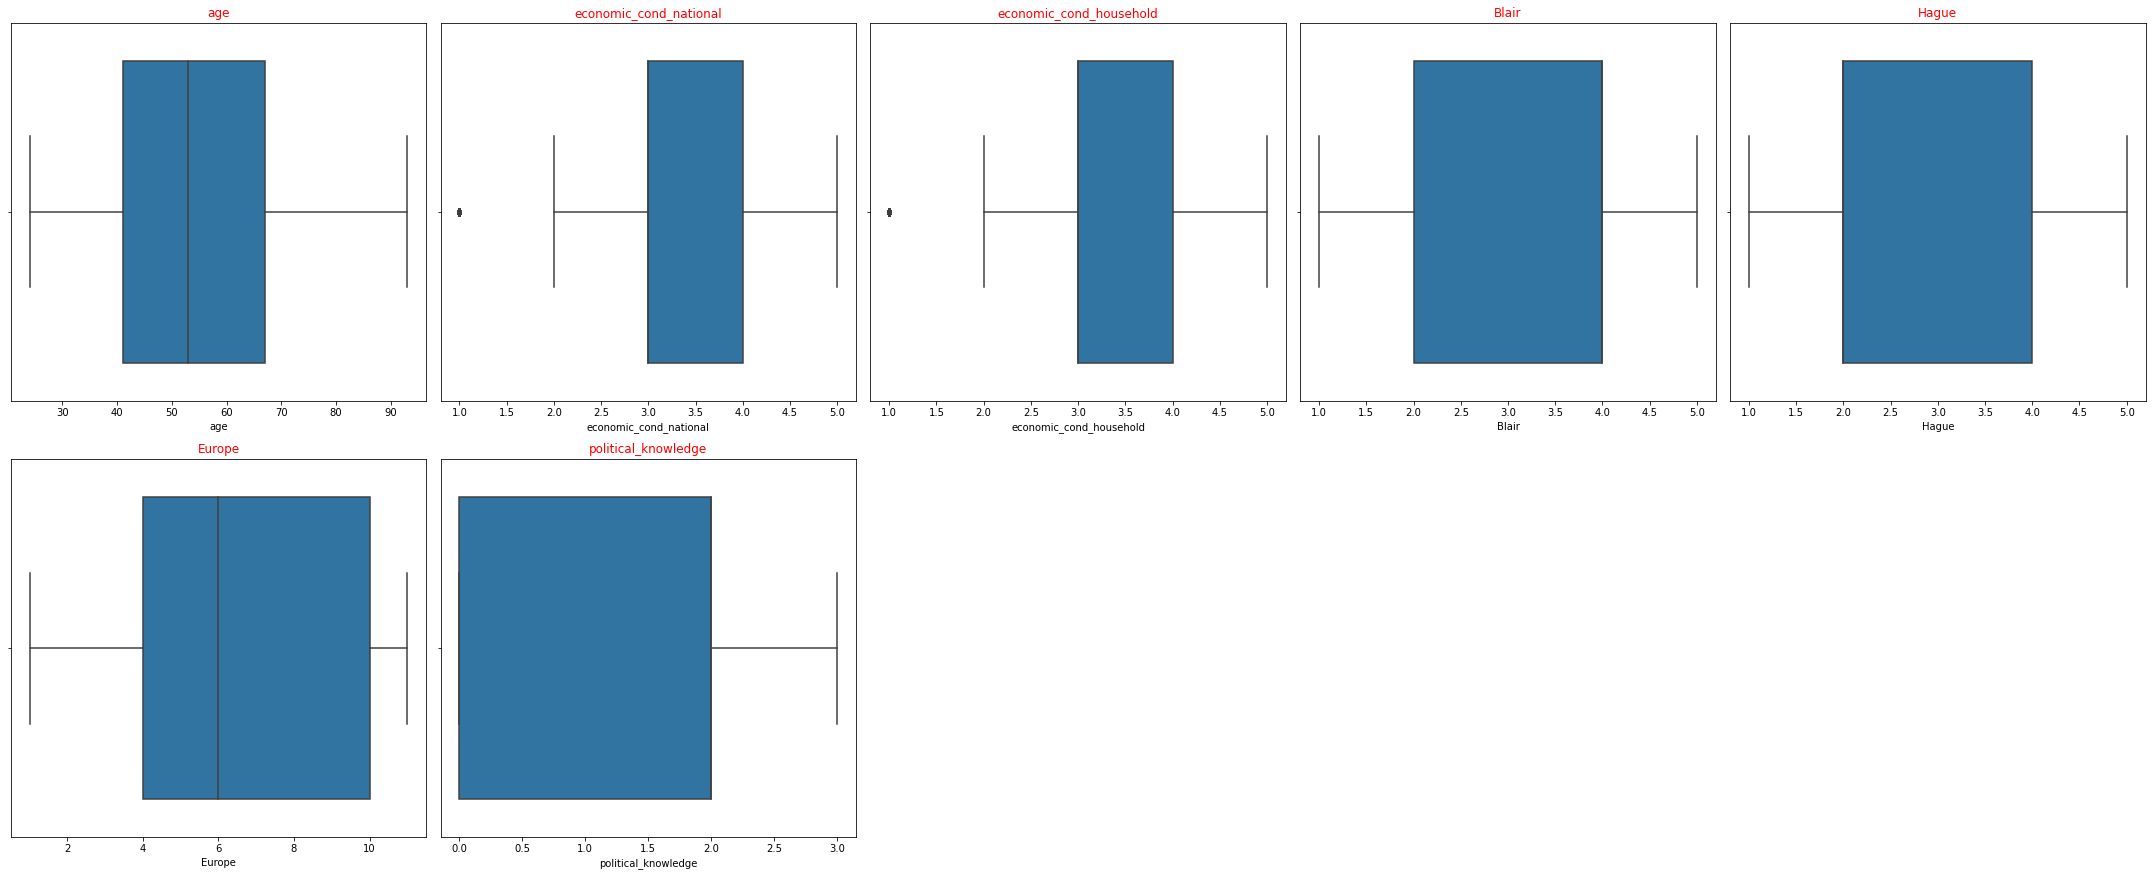

In [57]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [58]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [59]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [60]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

After removing Outliers

C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-p

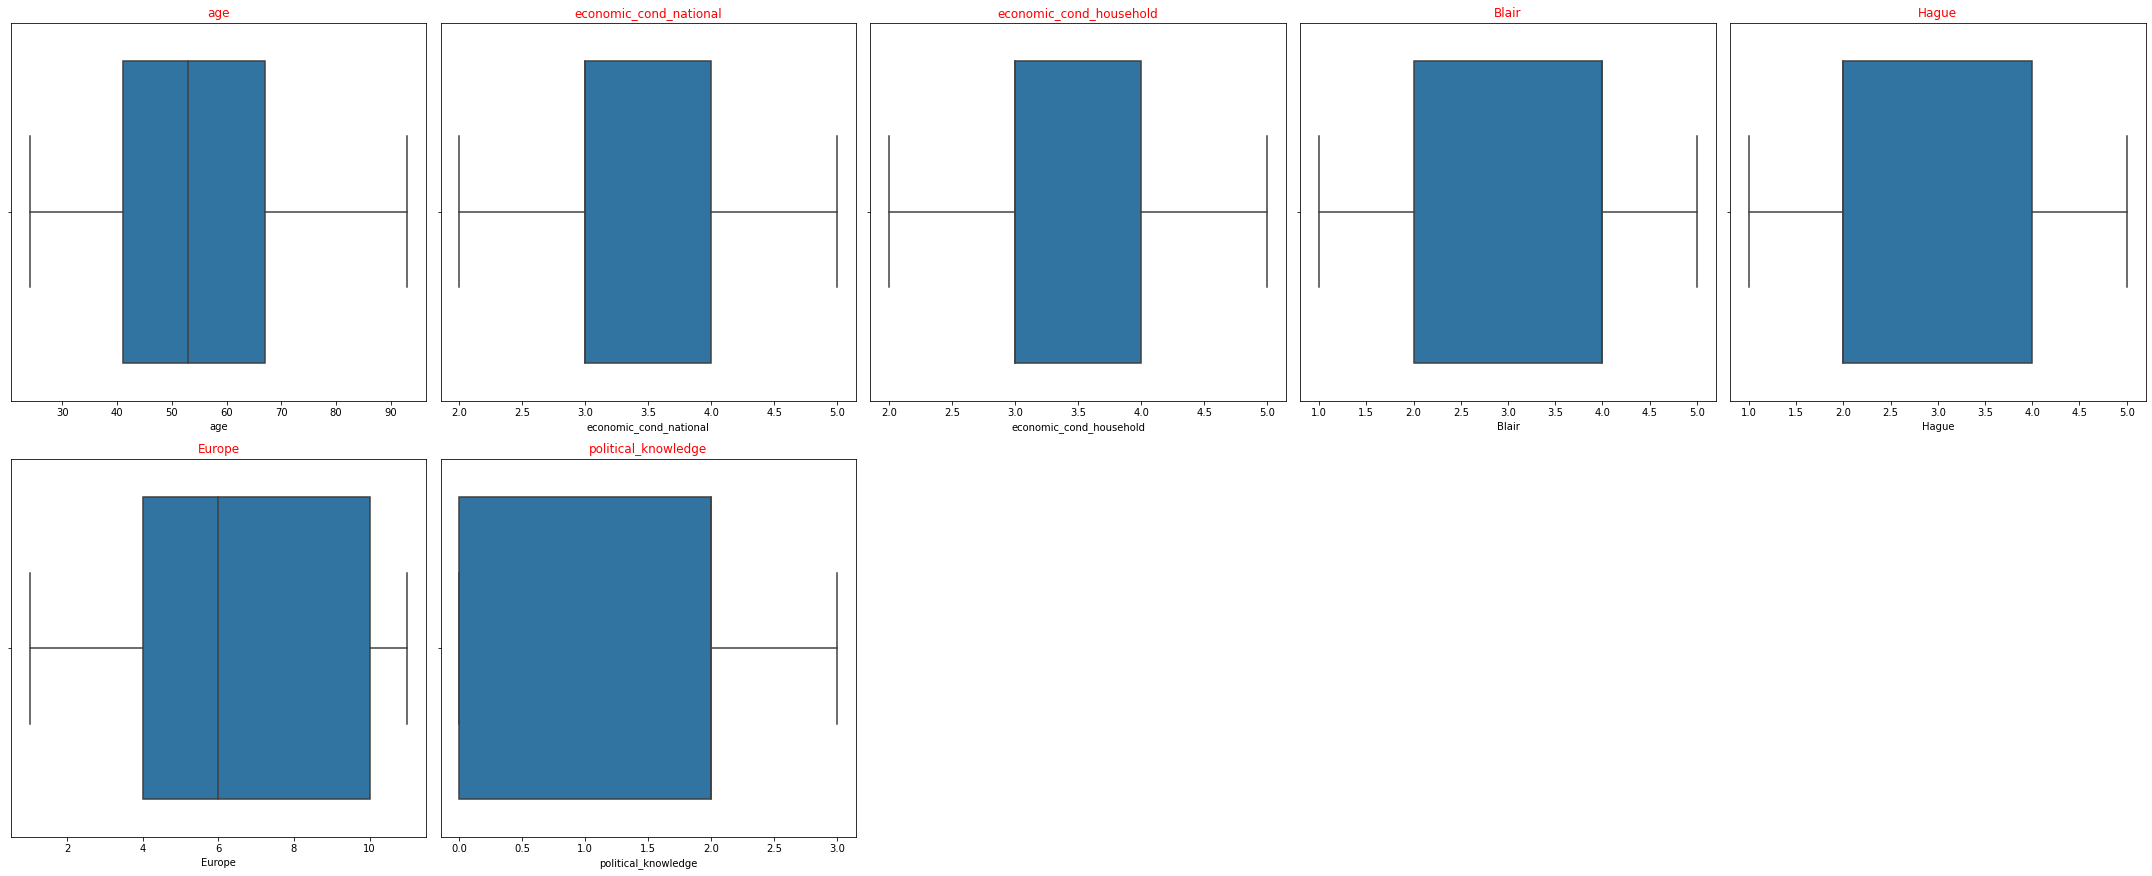

In [61]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [62]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [63]:
df.dtypes

vote                        int8
age                        int64
economic_cond_national     int64
economic_cond_household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political_knowledge        int64
gender                      int8
dtype: object

In [64]:
X = df.drop('vote', axis=1)

y = df['vote']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [66]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

LDA

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [68]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [69]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score1 = LDA_model.score(X_test, y_test)
print(model_score1)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



 Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [71]:
## Performance Matrix on train data set
y_train_predict = model.predict(X_train)
model_score2 = model.score(X_train, y_train)
print(model_score2)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8312912346842601
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [72]:
## Performance Matrix on test data set
y_test_predict = model.predict(X_test)
model_score3 = model.score(X_test, y_test)
print(model_score3)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Naive Bayes

In [73]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score3 = model.score(X_test, y_test)
print(model_score3)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [74]:
y_train_predict = model.predict(X_train)
model_score4 = model.score(X_train, y_train)
print(model_score4)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



KNN model

In [75]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
model_score5 = clf.score(X_test, y_test)
print(model_score5)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8245614035087719
[[101  52]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [76]:
y_train_predict = clf.predict(X_train)
model_score6 = clf.score(X_train, y_train)
print(model_score6)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8557964184731386
[[209  98]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances. 


1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

1.6 and 1.7 both combined and followed with each other. 

Logistic Regression

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty':['l2','l1','elasticnet'],
    'tol':[0.0001,0.01,],
    'random_state':[0,1,2],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']    
}

In [78]:
model = LogisticRegression(max_iter=10)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.fit(X_test, y_test)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. In

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\murb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0, 1, 2],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01]})

In [79]:
grid_search.best_params_
{'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001}
best_grid = grid_search.best_estimator_
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [80]:
confusion_matrix(y_train,ytrain_predict)

array([[195, 112],
       [ 63, 691]], dtype=int64)

In [81]:
model = LogisticRegression(solver='newton-cg',max_iter=10,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=10, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [82]:
y_predict1 = best_grid.predict(X_test)
y_predict2 = best_grid.predict(X_train)

In [83]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.483826,0.516174
1,0.252384,0.747616
2,0.014925,0.985075
3,0.787943,0.212057
4,0.115429,0.884571


In [84]:
model_score = best_grid.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8333333333333334


In [85]:
model_score1 = best_grid.score(X_train, y_train)
print('Accuracy Score is ',model_score1)

Accuracy Score is  0.8350612629594723


In [86]:
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict1))
print(metrics.classification_report(y_test, y_predict1))

0.8333333333333334
[[109  44]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [87]:
model_score1 = best_grid.score(X_train, y_train)
print(model_score1)
print(metrics.confusion_matrix(y_train, y_predict2))
print(metrics.classification_report(y_train, y_predict2))

0.8350612629594723
[[195 112]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


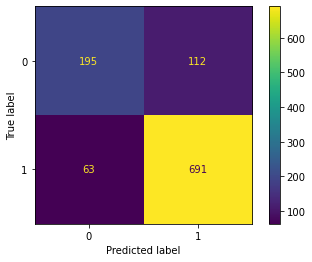

In [88]:
plot_confusion_matrix(best_grid,X_train,y_train)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


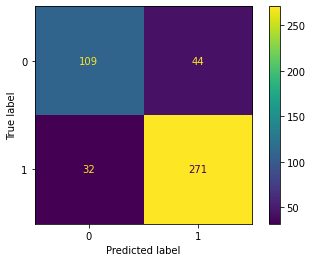

In [89]:
plot_confusion_matrix(best_grid,X_test,y_test)

AUC: 0.884


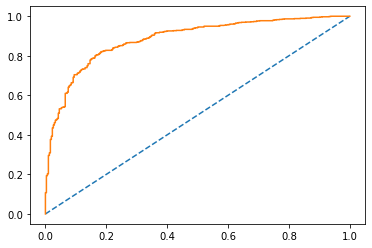

In [90]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.890


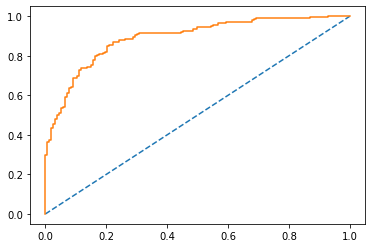

In [91]:
probs1 = best_grid.predict_proba(X_test)
probs1 = probs1[:, 1]
test_auc1 = roc_auc_score(y_test, probs1)
print('AUC: %.3f' % test_auc1)
test_fpr1, test_tpr1, test_thresholds1 = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr1, test_tpr1);

LDA

In [92]:
from sklearn.model_selection import GridSearchCV
LinearDiscriminantAnalysis()
param_grid = {
    'tol':[0.0001,0.01,0.001,0.000000001],
    'solver':['svd', 'lsqr', 'eigen'] 
}

In [93]:
X1 = df.drop('vote',axis=1)
Y1 = df.vote
test_size = 0.30
seed = 7

In [94]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=test_size, random_state=seed)

In [95]:
clf = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 9)
grid_search.fit(X_train1, y_train1)
grid_search.fit(X_test1, y_test1)
GridSearchCV(cv=9, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.01, 0.001, 1e-09]})
grid_search.best_params_
{'solver': 'lsqr', 'tol': 0.0001}
best_grid = grid_search.best_estimator_
best_grid
LinearDiscriminantAnalysis(solver='lsqr')

LinearDiscriminantAnalysis(solver='lsqr')

In [96]:
pred_class1 = best_grid.predict(X_test1)
pred_class2 = best_grid.predict(X_train1)

In [97]:
pred_prob_train = best_grid.predict_proba(X_train1)
pred_prob_test = best_grid.predict_proba(X_test1)

In [98]:
model_score2 = best_grid.score(X_test1, y_test1)
print('Accuracy Score is ',model_score2)

Accuracy Score is  0.8377192982456141


In [99]:
model_score3 = best_grid.score(X_train1, y_train1)
print('Accuracy Score is ',model_score3)

Accuracy Score is  0.8294062205466541


In [100]:
model_score2 = best_grid.score(X_test1, y_test1)
print(model_score2)
print(metrics.confusion_matrix(y_test1, pred_class1))
print(metrics.classification_report(y_test1, pred_class1))

0.8377192982456141
[[106  41]
 [ 33 276]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       147
           1       0.87      0.89      0.88       309

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [101]:
model_score3 = best_grid.score(X_train1, y_train1)
print(model_score3)
print(metrics.confusion_matrix(y_train1, pred_class2))
print(metrics.classification_report(y_train1, pred_class2))

0.8294062205466541
[[211 102]
 [ 79 669]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       313
           1       0.87      0.89      0.88       748

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


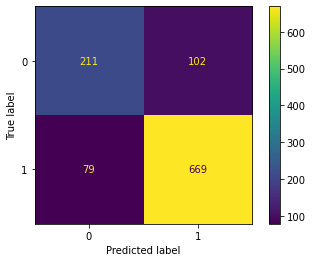

In [102]:
plot_confusion_matrix(best_grid,X_train1,y_train1)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


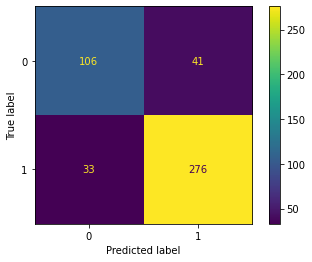

In [103]:
plot_confusion_matrix(best_grid,X_test1,y_test1)

AUC: 0.881


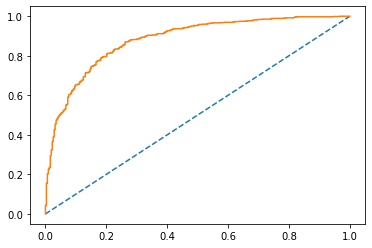

In [104]:
probs2 = best_grid.predict_proba(X_train1)
probs2 = probs2[:, 1]
auc2 = roc_auc_score(y_train1, probs2)
print('AUC: %.3f' % auc2)
train_fpr2, train_tpr2, train_thresholds2 = roc_curve(y_train1, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr2, train_tpr2);

AUC: 0.886


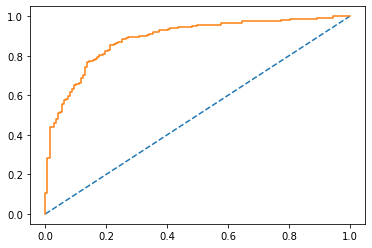

In [105]:
probs3 = best_grid.predict_proba(X_test1)
probs3 = probs3[:, 1]
auc3 = roc_auc_score(y_test1, probs3)
print('AUC: %.3f' % auc3)
train_fpr3, train_tpr3, train_thresholds3 = roc_curve(y_test1, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr3, train_tpr3);

KNN Model

In [106]:
X2 = df.drop('vote',axis=1)
Y2 = df.vote
test_size = 0.30
seed = 7

In [107]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=test_size, random_state=seed)

In [108]:
m1=KNeighborsClassifier()
KNeighborsClassifier()
param_grid = {
    'weights':['uniform', 'distance'],
    'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[30,45,50],
    'p':[2,1]
}

grid_search = GridSearchCV(estimator = m1, param_grid = param_grid, cv = 9)
grid_search.fit(X_train2, y_train2)
grid_search.fit(X_test2, y_test2)
GridSearchCV(cv=9, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 45, 50], 'p': [2, 1],
                         'weights': ['uniform', 'distance']})
grid_search.best_params_
{'algorithm': 'auto', 'leaf_size': 30, 'p': 1, 'weights': 'uniform'}
best_grid = grid_search.best_estimator_
best_grid
KNeighborsClassifier(p=1)

KNeighborsClassifier(p=1)

In [109]:
pd1 = best_grid.predict(X_test2)
pd2 = best_grid.predict(X_train2)

In [110]:
ppt1 = best_grid.predict_proba(X_train2)
ppt2 = best_grid.predict_proba(X_test2)

In [111]:
model_score4 = best_grid.score(X_test2, y_test2)
print('Accuracy Score is ',model_score4)

Accuracy Score is  1.0


In [112]:
model_score5 = best_grid.score(X_train2, y_train2)
print('Accuracy Score is ',model_score5)

Accuracy Score is  0.8001885014137606


In [113]:
model_score4 = best_grid.score(X_test2, y_test2)
print(model_score4)
print(metrics.confusion_matrix(y_test2, pd1))
print(metrics.classification_report(y_test2, pd1))

1.0
[[147   0]
 [  0 309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       309

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



In [114]:
model_score5 = best_grid.score(X_train2, y_train2)
print(model_score5)
print(metrics.confusion_matrix(y_train2, pd2))
print(metrics.classification_report(y_train2, pd2))

0.8001885014137606
[[206 107]
 [105 643]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       313
           1       0.86      0.86      0.86       748

    accuracy                           0.80      1061
   macro avg       0.76      0.76      0.76      1061
weighted avg       0.80      0.80      0.80      1061



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


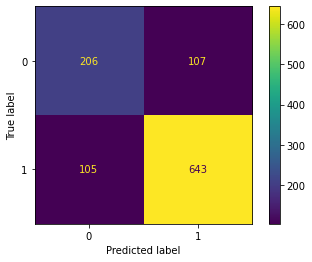

In [115]:
plot_confusion_matrix(best_grid,X_train2,y_train2)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


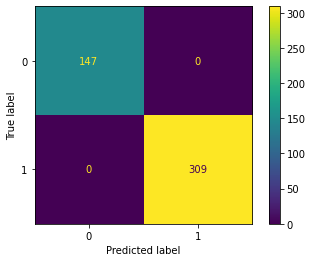

In [116]:
plot_confusion_matrix(best_grid,X_test2,y_test2)

AUC: 0.841


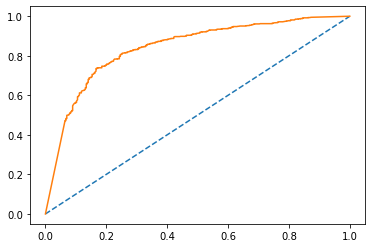

In [117]:
prbs2 = best_grid.predict_proba(X_train2)
prbs2 = prbs2[:, 1]
auc4 = roc_auc_score(y_train2, prbs2)
print('AUC: %.3f' % auc4)
train_fpr4, train_tpr4, train_thresholds4 = roc_curve(y_train2, prbs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr4, train_tpr4);

AUC: 1.000


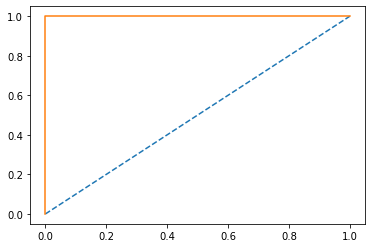

In [118]:
prbs3 = best_grid.predict_proba(X_test2)
prbs3 = prbs3[:, 1]
auc5 = roc_auc_score(y_test2, prbs3)
print('AUC: %.3f' % auc5)
train_fpr5, train_tpr5, train_thresholds5 = roc_curve(y_test2, prbs3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr5, train_tpr5);

In [119]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
KNN_model.fit(X_train2,y_train2)
y_test_predict = KNN_model.predict(X_test2)
print("Accuracy Score for K=3 is ", KNN_model.score(X_test2, y_test2))
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
KNN_model.fit(X_train2,y_train2)
y_test_predict = KNN_model.predict(X_test2)
print("Accuracy Score for K=5 is ", KNN_model.score(X_test2, y_test2))
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')
KNN_model.fit(X_train2,y_train2)
y_test_predict = KNN_model.predict(X_test2)
print("Accuracy Score for K=9 is ", KNN_model.score(X_test2, y_test2))

Accuracy Score for K=3 is  0.7807017543859649
Accuracy Score for K=5 is  0.7763157894736842
Accuracy Score for K=9 is  0.7894736842105263


In [120]:
ac_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    scores = knn.score(X_test2, y_test)
    ac_scores.append(scores)
MCE = [1 - x for x in ac_scores]
MCE

[0.44956140350877194,
 0.4649122807017544,
 0.45175438596491224,
 0.45614035087719296,
 0.4473684210526315,
 0.44956140350877194,
 0.44956140350877194,
 0.44956140350877194,
 0.4298245614035088,
 0.4429824561403509]

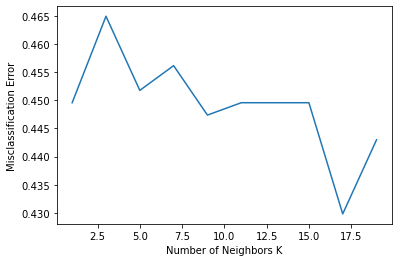

In [121]:
import matplotlib.pyplot as plt
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [122]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train2, y_train2)

KNeighborsClassifier()

In [123]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test2)
model_score = KNN_SM_model.score(X_test2, y_test2)
print(model_score)
print(metrics.confusion_matrix(y_test2, y_test_predict))
print(metrics.classification_report(y_test2, y_test_predict))

0.7763157894736842
[[ 85  62]
 [ 40 269]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62       147
           1       0.81      0.87      0.84       309

    accuracy                           0.78       456
   macro avg       0.75      0.72      0.73       456
weighted avg       0.77      0.78      0.77       456



In [124]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_train2)
model_score = KNN_SM_model.score(X_train2, y_train2)
print(model_score)
print(metrics.confusion_matrix(y_train2, y_test_predict))
print(metrics.classification_report(y_train2, y_test_predict))

0.8510838831291234
[[212 101]
 [ 57 691]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       313
           1       0.87      0.92      0.90       748

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



Naives Bayes

In [125]:
X3 = df.drop('vote',axis=1)
Y3 = df.vote
test_size = 0.30
seed = 7

In [126]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=test_size, random_state=seed)

In [127]:
m2 = GaussianNB()
model3=m2.fit(X3,Y3)
model3

GaussianNB()

In [128]:
pd3 = model3.predict(X_test3)
pd4 = model3.predict(X_train3)

In [129]:
ppt3 = model3.predict_proba(X_train3)
ppt4 = model3.predict_proba(X_test3)

In [130]:
model_score6 = model3.score(X_test3, y_test3)
print('Accuracy Score is ',model_score6)

Accuracy Score is  0.8267543859649122


In [131]:
model_score7 = model3.score(X_train3, y_train3)
print('Accuracy Score is ',model_score7)

Accuracy Score is  0.8369462770970783


In [132]:
model_score6 = model3.score(X_test3, y_test3)
print(model_score6)
print(metrics.confusion_matrix(y_test3, pd3))
print(metrics.classification_report(y_test3, pd3))

0.8267543859649122
[[104  43]
 [ 36 273]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       147
           1       0.86      0.88      0.87       309

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [133]:
model_score7 = model3.score(X_train3, y_train3)
print(model_score7)
print(metrics.confusion_matrix(y_train3, pd4))
print(metrics.classification_report(y_train3, pd4))

0.8369462770970783
[[222  91]
 [ 82 666]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       313
           1       0.88      0.89      0.89       748

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


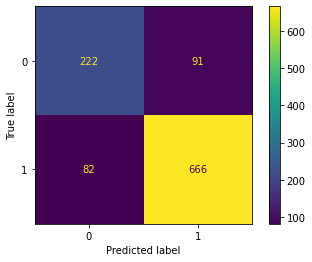

In [134]:
plot_confusion_matrix(model3,X_train3,y_train3)

C:\Users\murb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


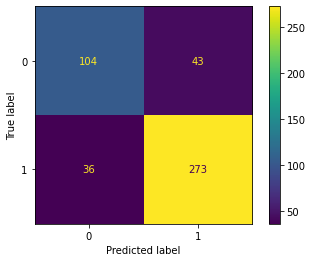

In [135]:
plot_confusion_matrix(model3,X_test3,y_test3)

AUC: 0.889


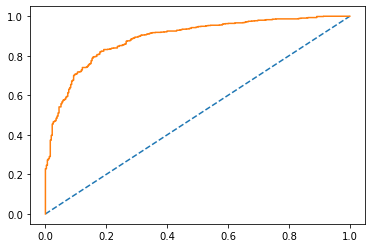

In [136]:
prbs4 = model3.predict_proba(X_train3)
prbs4 = prbs4[:, 1]
auc6 = roc_auc_score(y_train3, prbs4)
print('AUC: %.3f' % auc6)
train_fpr6, train_tpr6, train_thresholds6 = roc_curve(y_train3, prbs4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr6, train_tpr6);

AUC: 0.877


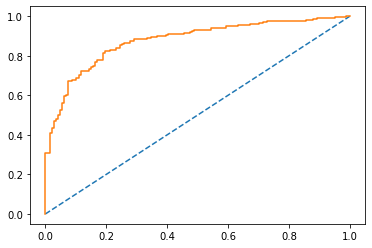

In [137]:
prbs5 = model3.predict_proba(X_test3)
prbs5 = prbs5[:, 1]
auc7 = roc_auc_score(y_test3, prbs5)
print('AUC: %.3f' % auc7)
train_fpr7, train_tpr7, train_thresholds7 = roc_curve(y_test3, prbs5)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr7, train_tpr7);

In [138]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train3, y_train3)

GaussianNB()

In [139]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train3)
model_score = NB_SM_model.score(X_train3, y_train3)
print(model_score)
print(metrics.confusion_matrix(y_train3, y_train_predict))
print(metrics.classification_report(y_train3 ,y_train_predict))

0.8312912346842601
[[216  97]
 [ 82 666]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       313
           1       0.87      0.89      0.88       748

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Decision tree

In [140]:
X4 = df.drop('vote',axis=1)
y4 = df.vote
test_size = 0.30
seed = 7

In [141]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=.30, random_state=1)

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9],#[3,5,7,9],
    'min_samples_leaf': [50],#[50,100, 150],
    'min_samples_split': [450],#[150,300,450],
}

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)

grid_search = GridSearchCV(estimator = dTree, param_grid = param_grid, cv = 3)
grid_search.fit(X_train4, y_train4)
grid_search.fit(X_test4, y_test4)
grid_search.best_params_
best_grid = grid_search.best_estimator_

In [143]:
pd5 = best_grid.predict(X_test4)
pd6 = best_grid.predict(X_train4)

In [144]:
print(best_grid.score(X_train4, y_train4))
print(best_grid.score(X_test4, y_test4))

0.7200754005655042
0.7324561403508771


In [145]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train4, y_train4)
print(dTreeR.score(X_train4, y_train4))
print(dTreeR.score(X_test4, y_test4))

0.8086710650329878
0.7894736842105263


In [146]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [147]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train4.columns))

                              Imp
age                      0.000000
economic_cond_national   0.000000
economic_cond_household  0.016012
Blair                    0.291569
Hague                    0.514417
Europe                   0.139003
political_knowledge      0.038999
gender                   0.000000


In [148]:
model_score8 = best_grid.score(X_train4, y_train4)
print(model_score8)
print(metrics.confusion_matrix(y_train4, pd6))
print(metrics.classification_report(y_train4, pd6))

0.7200754005655042
[[234  73]
 [224 530]]
              precision    recall  f1-score   support

           0       0.51      0.76      0.61       307
           1       0.88      0.70      0.78       754

    accuracy                           0.72      1061
   macro avg       0.69      0.73      0.70      1061
weighted avg       0.77      0.72      0.73      1061



In [149]:
y_test_predict = best_grid.predict(X_test4)
model_score = best_grid.score(X_test4, y_test4)
print(model_score)
print(metrics.confusion_matrix(y_test4, y_test_predict))
print(metrics.classification_report(y_test4, y_test_predict))

0.7324561403508771
[[120  33]
 [ 89 214]]
              precision    recall  f1-score   support

           0       0.57      0.78      0.66       153
           1       0.87      0.71      0.78       303

    accuracy                           0.73       456
   macro avg       0.72      0.75      0.72       456
weighted avg       0.77      0.73      0.74       456



0.7324561403508771


<AxesSubplot:>

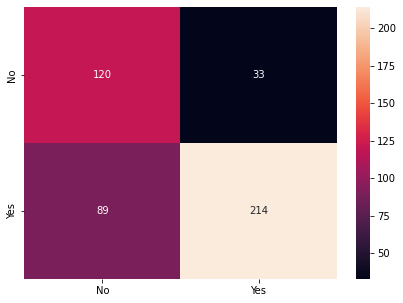

In [150]:
print(best_grid.score(X_test4, y_test4))
y_predict = best_grid.predict(X_test4)
cm=metrics.confusion_matrix(y_test4, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC: 0.733


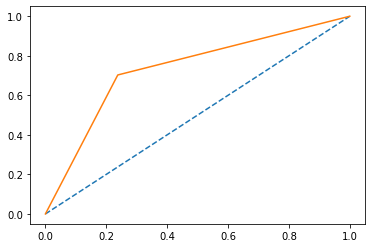

In [151]:
prbs10 = best_grid.predict_proba(X_train4)
prbs10 = prbs10[:, 1]
auc10 = roc_auc_score(y_train4, prbs10)
print('AUC: %.3f' % auc10)
train_fpr10, train_tpr10, train_thresholds10 = roc_curve(y_train4, prbs10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr10, train_tpr10);

AUC: 0.745


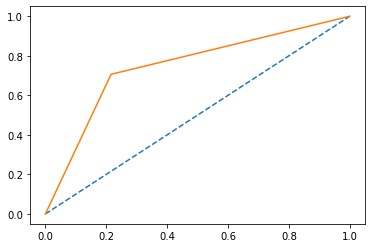

In [152]:
prbs11 = best_grid.predict_proba(X_test4)
prbs11 = prbs11[:, 1]
auc11 = roc_auc_score(y_test4, prbs11)
print('AUC: %.3f' % auc11)
train_fpr11, train_tpr11, train_thresholds11 = roc_curve(y_test4, prbs11)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr11, train_tpr11);

Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train4, y_train4)

In [154]:
y_train_predicts = bgcl.predict(X_train4)
model_scores =bgcl.score(X_train4, y_train4)
print(model_scores)
print(metrics.confusion_matrix(y_train4, y_train_predicts))
print(metrics.classification_report(y_train4, y_train_predicts))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [155]:
## Performance Matrix on test data set
y_test_predict = bgcl.predict(X_test4)
model_score = bgcl.score(X_test4, y_test4)
print(model_score)
print(metrics.confusion_matrix(y_test4, y_test_predict))
print(metrics.classification_report(y_test4, y_test_predict))

0.8245614035087719
[[112  41]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



0.8245614035087719


<AxesSubplot:>

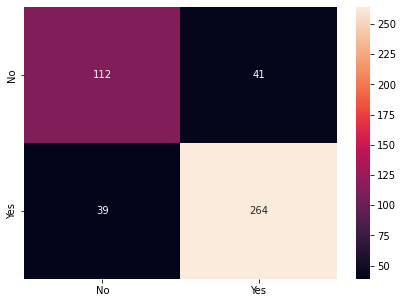

In [156]:
y_predict5 = bgcl.predict(X_test4)
print(bgcl.score(X_test4 , y_test4))
cm1=metrics.confusion_matrix(y_test4, y_predict5,labels=[0, 1])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g')

AUC: 1.000


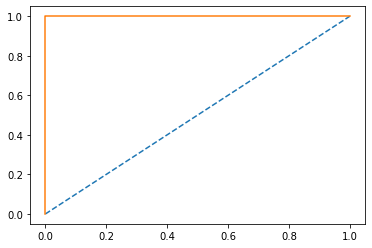

In [157]:
prbs12 = bgcl.predict_proba(X_train4)
prbs12 = prbs12[:, 1]
auc12 = roc_auc_score(y_train4, prbs12)
print('AUC: %.3f' % auc12)
train_fpr12, train_tpr12, train_thresholds12 = roc_curve(y_train4, prbs12)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr12, train_tpr12);

AUC: 0.879


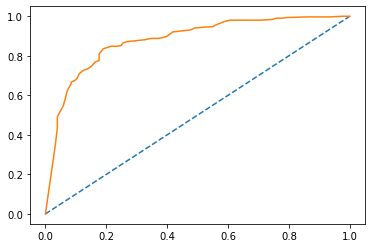

In [158]:
prbs13 = bgcl.predict_proba(X_test4)
prbs13 = prbs13[:, 1]
auc13 = roc_auc_score(y_test4, prbs13)
print('AUC: %.3f' % auc13)
train_fpr13, train_tpr13, train_thresholds13 = roc_curve(y_test4, prbs13)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr13, train_tpr13);

ADA Boosting

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}
abcl=AdaBoostClassifier()
grid_search=GridSearchCV(estimator=abcl,param_grid=param_grid)
grid_search.fit(X_train4, y_train4)
grid_search.fit(X_test4, y_test4)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [160]:
best_grid=grid_search.best_estimator_
best_grid.fit(X_train4,y_train4)
AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [161]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train4)
model_score = best_grid.score(X_train4, y_train4)
print(model_score)
print(metrics.confusion_matrix(y_train4, y_train_predict))
print(metrics.classification_report(y_train4, y_train_predict))

0.8369462770970783
[[186 121]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [162]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test4)
model_score = best_grid.score(X_test4, y_test4)
print(model_score)
print(metrics.confusion_matrix(y_test4, y_test_predict))
print(metrics.classification_report(y_test4, y_test_predict))

0.8092105263157895
[[ 99  54]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



0.8092105263157895


<AxesSubplot:>

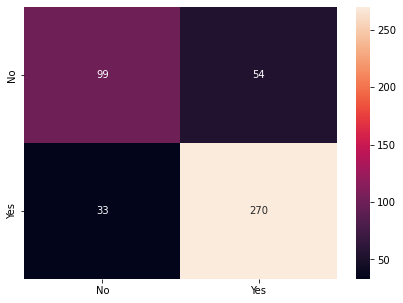

In [163]:
y_predict6 = best_grid.predict(X_test4)
print(best_grid.score(X_test4 , y_test4))
cm2=metrics.confusion_matrix(y_test4, y_predict6,labels=[0, 1])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g')

In [164]:
## Performance Matrix on train data set
y_train_predict6 = best_grid.predict(X_train4)
model_score6 = best_grid.score(X_train4, y_train4)
print(model_score6)
print(metrics.confusion_matrix(y_train4, y_train_predict6))
print(metrics.classification_report(y_train4, y_train_predict6))

0.8369462770970783
[[186 121]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [165]:
## Performance Matrix on test data set
y_test_predict6 = best_grid.predict(X_test4)
model_score7 = best_grid.score(X_test4, y_test4)
print(model_score7)
print(metrics.confusion_matrix(y_test4, y_test_predict6))
print(metrics.classification_report(y_test4, y_test_predict6))

0.8092105263157895
[[ 99  54]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.901


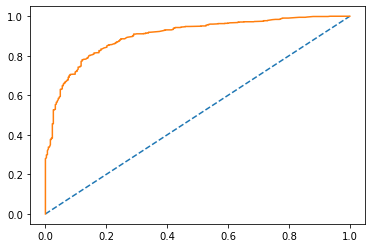

In [166]:
# predict probabilities
prbs14 = best_grid.predict_proba(X_train4)
# keep probabilities for the positive outcome only
prbs14 = prbs14[:, 1]
# calculate AUC
auc14 = roc_auc_score(y_train4, prbs14)
print('AUC: %.3f' % auc14)
# calculate roc curve
train_fpr14, train_tpr14, train_thresholds14 = roc_curve(y_train4, prbs14)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr14, train_tpr14);

AUC: 0.884


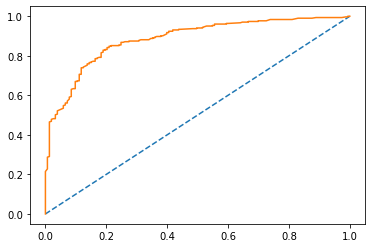

In [167]:
# predict probabilities
prbs15 = best_grid.predict_proba(X_test4)
# keep probabilities for the positive outcome only
prbs15 = prbs15[:, 1]
# calculate AUC
auc15 = roc_auc_score(y_test4, prbs15)
print('AUC: %.3f' % auc15)
# calculate roc curve
train_fpr15, train_tpr15, train_thresholds15 = roc_curve(y_test4, prbs15)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr15, train_tpr15);

Gradient Boosting

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train4, y_train4)

0.8289473684210527


<AxesSubplot:>

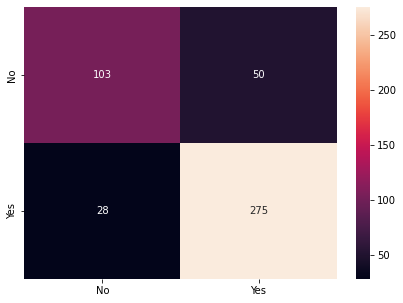

In [169]:
y_predict7 = gbcl.predict(X_test4)
print(gbcl.score(X_test4, y_test4))
cm3=metrics.confusion_matrix(y_test4, y_predict7,labels=[0, 1])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g')

In [170]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train4)
model_score = gbcl.score(X_train4, y_train4)
print(model_score)
print(metrics.confusion_matrix(y_train4, y_train_predict))
print(metrics.classification_report(y_train4, y_train_predict))

0.8803016022620169
[[226  81]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [171]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test4)
model_score = gbcl.score(X_test4, y_test4)
print(model_score)
print(metrics.confusion_matrix(y_test4, y_test_predict))
print(metrics.classification_report(y_test4, y_test_predict))

0.8289473684210527
[[103  50]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.935


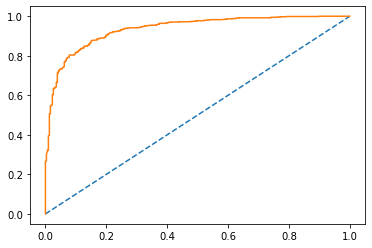

In [172]:
prbs16 = gbcl.predict_proba(X_train4)
prbs16 = prbs16[:, 1]
auc16 = roc_auc_score(y_train4, prbs16)
print('AUC: %.3f' % auc16)
train_fpr16, train_tpr16, train_thresholds16 = roc_curve(y_train4, prbs16)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr16, train_tpr16);

AUC: 0.897


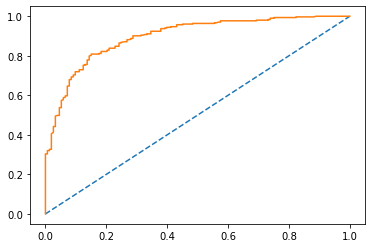

In [173]:
prbs17 = gbcl.predict_proba(X_test4)
prbs17 = prbs17[:, 1]
auc17 = roc_auc_score(y_test4, prbs17)
print('AUC: %.3f' % auc17)
train_fpr17, train_tpr17, train_thresholds17 = roc_curve(y_test4, prbs17)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr17, train_tpr17);

Random Forest

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [9],#[3,5,7,9]
    'min_samples_leaf': [50], #[50,100, 150]
    'min_samples_split': [300], #[150,300,450]
    'n_estimators': [25] #[25, 50, 100]
}

rfcl = RandomForestClassifier(n_estimators=100,random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search.fit(X_train4, y_train4)
grid_search.fit(X_test4, y_test4)
grid_search.best_params_
best_grid = grid_search.best_estimator_

In [175]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train4)
model_score =best_grid.score(X_train4, y_train4)
print(model_score)
print(metrics.confusion_matrix(y_train4, y_train_predict))
print(metrics.classification_report(y_train4, y_train_predict))

0.7106503298774741
[[  0 307]
 [  0 754]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.71      1.00      0.83       754

    accuracy                           0.71      1061
   macro avg       0.36      0.50      0.42      1061
weighted avg       0.51      0.71      0.59      1061



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test4)
model_score = best_grid.score(X_test4, y_test4)
print(model_score)
print(metrics.confusion_matrix(y_test4, y_test_predict))
print(metrics.classification_report(y_test4, y_test_predict))

0.6644736842105263
[[  0 153]
 [  0 303]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.66      1.00      0.80       303

    accuracy                           0.66       456
   macro avg       0.33      0.50      0.40       456
weighted avg       0.44      0.66      0.53       456



C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\murb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.739


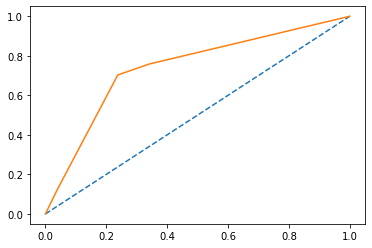

In [177]:
prbs18 = best_grid.predict_proba(X_train4)
prbs18 = prbs18[:, 1]
auc18 = roc_auc_score(y_train4, prbs18)
print('AUC: %.3f' % auc18)
train_fpr18, train_tpr18, train_thresholds18 = roc_curve(y_train4, prbs18)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr18, train_tpr18);

AUC: 0.765


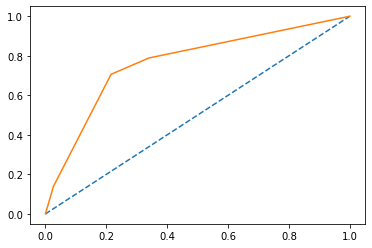

In [178]:
prbs19 = best_grid.predict_proba(X_test4)
prbs19 = prbs19[:, 1]
auc19 = roc_auc_score(y_test4, prbs19)
print('AUC: %.3f' % auc19)
train_fpr19, train_tpr19, train_thresholds19 = roc_curve(y_test4, prbs19)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr19, train_tpr19);

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

Answer mentioned in Business report

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [179]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\murb\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

Number of Words

In [180]:
m1=inaugural.raw('1941-Roosevelt.txt')
num_words=m1.split()
len(num_words)

1360

In [181]:
m2=inaugural.raw('1961-Kennedy.txt')
num_words=m2.split()
len(num_words)

1390

In [182]:
m3=inaugural.raw('1973-Nixon.txt')
num_words=m3.split()
len(num_words)

1819

Number of Characters

In [183]:
#Roosevelt
num_chars1 = len(m1)
num_chars1

7571

In [184]:
#Kennedy
num_chars2 = len(m2)
num_chars2

7618

In [185]:
#Nixon
num_chars3 = len(m3)
num_chars3

9991

Number of Sentences

In [186]:
#1941-Roosevelt
num_sent1 = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')}, index=[0])
num_sent1['sentences']= num_sent1['Text'].apply(lambda m1:len([m1 for m1 in m1.split()if m1.endswith('.')]))
num_sent1

,Text,sentences
0,On each national day of inauguration since 178...,67


In [187]:
#1961-Kennedy
num_sent2 = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')}, index=[0])
num_sent2['sentences']= num_sent2['Text'].apply(lambda m2:len([m2 for m2 in m2.split()if m2.endswith('.')]))
num_sent2

,Text,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [188]:
#1973-Nixon
num_sent3 = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')}, index=[0])
num_sent3['sentences']= num_sent3['Text'].apply(lambda m3:len([m3 for m3 in m3.split()if m3.endswith('.')]))
num_sent3

,Text,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [189]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [190]:
#Roosevelt
stop_words = set(stopwords.words('English'))
words = word_tokenize(m1)
new_sentence = [m for m in words if not m in stop_words]
new_sentence =[]
for m in words:
    if m not in stop_words:
        new_sentence.append(m)
print(words)
print(new_sentence)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [191]:
#Kennedy
stop_words = set(stopwords.words('English'))
words = word_tokenize(m2)
new_sentence = [m for m in words if not m in stop_words]
new_sentence =[]
for m in words:
    if m not in stop_words:
        new_sentence.append(m)
print(words)
print(new_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [192]:
#Nixon
stop_words = set(stopwords.words('English'))
words = word_tokenize(m3)
new_sentence = [m for m in words if not m in stop_words]
new_sentence =[]
for m in words:
    if m not in stop_words:
        new_sentence.append(m)
print(words)
print(new_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [193]:
#Roosevelt
b1 = RegexpTokenizer(r'\w+')
c1 = b1.tokenize(m1)
set(a.title() for a in c1 if a.lower() not in stopwords.words())
d1 = Counter(a.title() for a in c1 if a.lower() not in stopwords.words())
d1.most_common()

[('Nation', 12),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('History', 3),
 ('Nations', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Continent', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Disruption', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('Lives', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('Things', 2),
 ('Present', 2),
 ('Built', 2),
 ('Maintained', 2),
 ('Constitution', 2),
 ('Freely', 2),
 ('American', 2),
 ('Enterprise', 2),
 ('Forms', 2),
 ('Hopes', 2),
 ('Find', 2),
 ('Early', 2),
 ('Peoples', 2),
 ('Written', 2),
 ('Land', 2),
 ('Forward', 2),
 ('Words', 2),
 ('Preservation', 2),

In [194]:
#Kennedy
b1 = RegexpTokenizer(r'\w+')
c1 = b1.tokenize(m2)
set(a.title() for a in c1 if a.lower() not in stopwords.words())
d1 = Counter(a.title() for a in c1 if a.lower() not in stopwords.words())
d1.most_common()

[('World', 8),
 ('Sides', 8),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Free', 5),
 ('Nations', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Hope', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Generation', 3),
 ('Bear', 3),
 ('Control', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Burden', 2),
 ('Meet', 2),
 ('Support', 2),
 ('Oppose', 2),
 ('Assure', 2),
 ('Success', 2),
 ('Loyalty', 2),
 ('United', 2),
 ('Powerful', 2),
 ('States', 2),
 ('Welcome', 2),
 ('Tyranny', 2),
 ('Find', 2),
 ('Supporting', 2),
 ('Back', 2),
 ('Seek', 2),
 ('South', 2),
 ('Offer', 2),
 ('Deeds

In [195]:
#Nixon
b1 = RegexpTokenizer(r'\w+')
c1 = b1.tokenize(m3)
set(a.title() for a in c1 if a.lower() not in stopwords.words())
d1 = Counter(a.title() for a in c1 if a.lower() not in stopwords.words())
d1.most_common()

[('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Years', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('History', 7),
 ('Time', 6),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Individual', 3),
 ('Ashamed', 3),
 ('Spirit', 2),
 ('Conflict', 2),
 ('Meet', 2),
 ('Stand', 2),
 ('Enter', 2),
 ('Leads', 2),
 ('Danger', 2),
 ('Renew', 2),
 ('Past', 2),
 ('Year', 2),
 ('Initiatives', 2),
 ('Wars', 2),
 ('Generations', 2),
 ('Important', 2),
 (